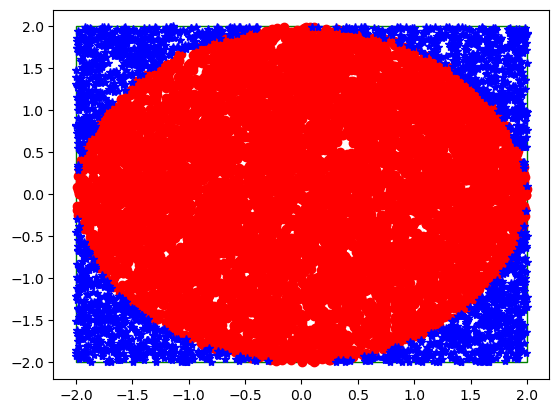

In [1]:
# Monte Carlo Simulation to calculate the area of a circle
import numpy as np
import matplotlib.pyplot as plt

# Define circle parameters
r = 2
c_x = 0
c_y = 0

# Calculate rectangle position
p_x = c_x - r
p_y = c_y - r
pos = [p_x, p_y, 2 * r, 2 * r]

# Generate random points
N = 10000
x = np.random.uniform(p_x, p_x + 2 * r, N)
y = np.random.uniform(p_x, p_x + 2 * r, N)

# Calculate radii
radii = np.sqrt((x - c_x) ** 2 + (y - c_y) ** 2)

# Determine hits and misses
i = radii <= r
hits = np.sum(i)
misses = N - hits

# Plot points
plt.plot(x[i], y[i], 'or')
plt.plot(x[~i], y[~i], '*b')

# Plot rectangle
plt.gca().add_patch(plt.Rectangle((p_x, p_y), 2 * r, 2 * r, fill=False, edgecolor='g'))

# Calculate actual area
actual_area = np.pi * r**2

plt.show()

Number of points: 100000
Estimated volume:  4.182640
Actual volume:  4.188790
Error:  0.1468%



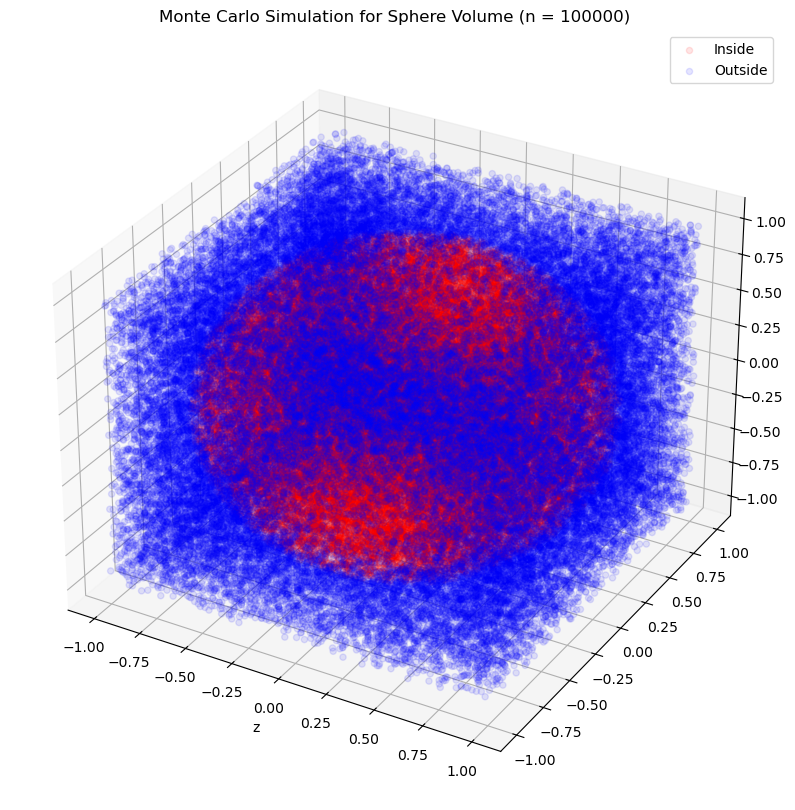

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_monte_carlo(r, n):

    x = np.random.uniform(-r, r, n)
    y = np.random.uniform(-r, r, n)
    z = np.random.uniform(-r, r, n)

    inside = (x**2 + y**2 + z**2) <= r**2

    total_volume = (2 * r) ** 3
    sphere_volume = total_volume * np.sum(inside) / n
    return sphere_volume, x, y, z, inside

def plot_results_3d(x, y, z, inside, r):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111, projection = "3d")
    ax.scatter(x[inside], y[inside], z[inside], c = "r", alpha = 0.1, label = "Inside")
    ax.scatter(x[~inside], y[~inside], z[~inside], c = "b", alpha = 0.1, label = "Outside")

    ax.set_xlabel("x")
    ax.set_xlabel("y")
    ax.set_xlabel("z")
    ax.set_title(f"Monte Carlo Simulation for Sphere Volume (n = {len(x)})")
    ax.legend()
    plt.show()

r = 1
actual_volume = 4 / 3 * np.pi * r ** 3
trial_numbers = [100000]
estimated_volume, x, y, z, inside = sphere_monte_carlo(r, trial_numbers[0])
error = abs(estimated_volume - actual_volume) / actual_volume * 100

print(f"Number of points: {trial_numbers[0]}")
print(f"Estimated volume: {estimated_volume: .6f}")
print(f"Actual volume: {actual_volume: .6f}")
print(f"Error: {error: .4f}%")
print()
plot_results_3d(x, y, z, inside, r)